In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/0_Ca_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0Ca/0Que
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0Ca/0Que
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0Ca/0Que
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0Ca/0Que
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0Ca/0Que


In [4]:
df.target.unique()

array(['0Ca/0Que', '0Ca/10Que', '0Ca/100Que'], dtype=object)

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0


# Tree based algorithms

In [6]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [8]:
dtc = DecisionTreeClassifier(max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.72524752 0.71782178 0.72862454 0.71127633]
 CV Mean score: 0.7207425435852135


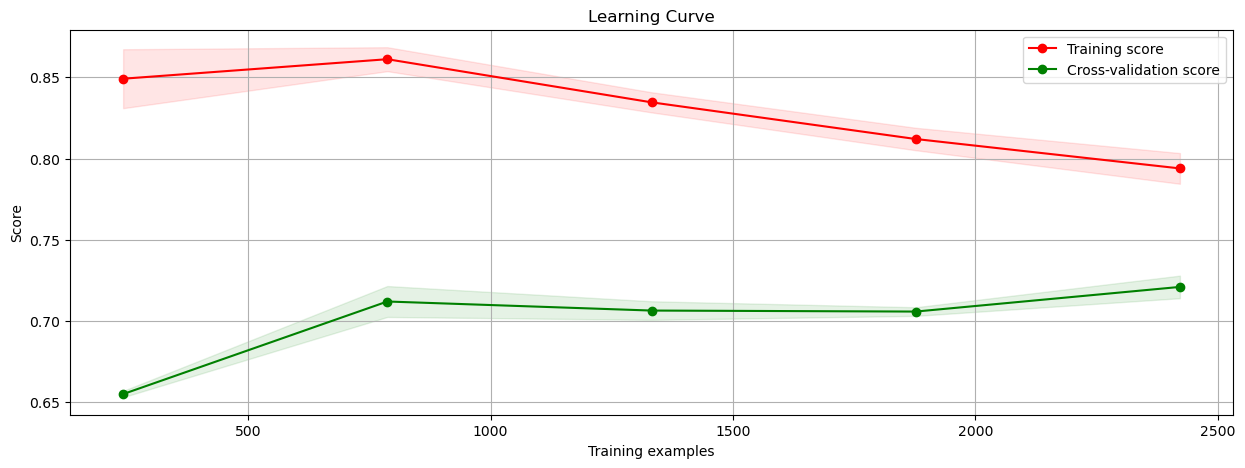

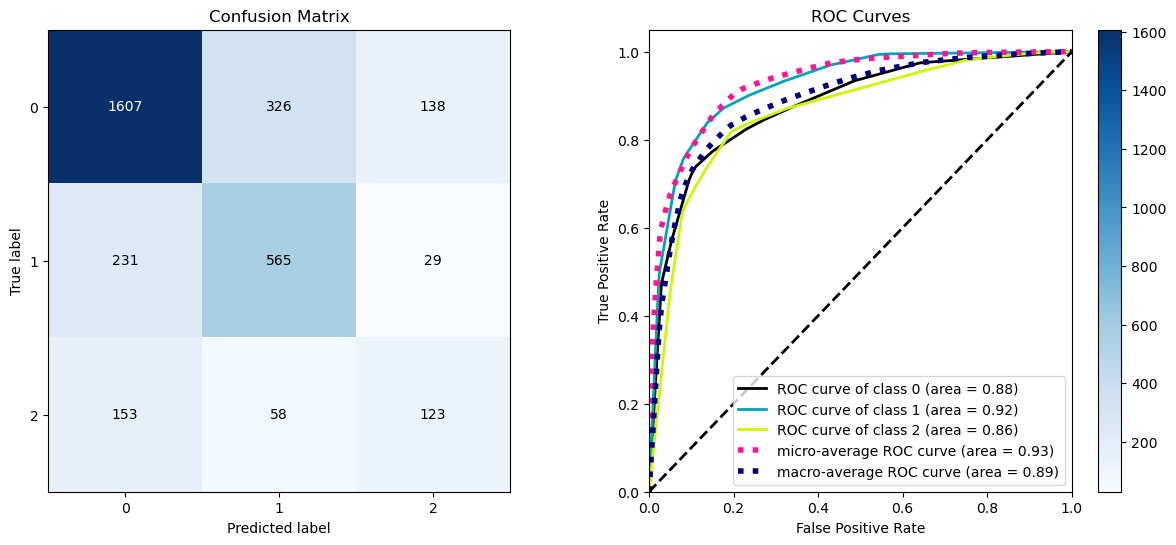

In [9]:
run_model(dtc, X_train, y_train)

In [10]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15)

In [11]:
dtc_pred = dtc.predict(X_test)

In [12]:
f1_score(y_test, dtc_pred, average='weighted')

0.7172219247813516

In [13]:
accuracy_score(y_test, dtc_pred)

0.724009900990099

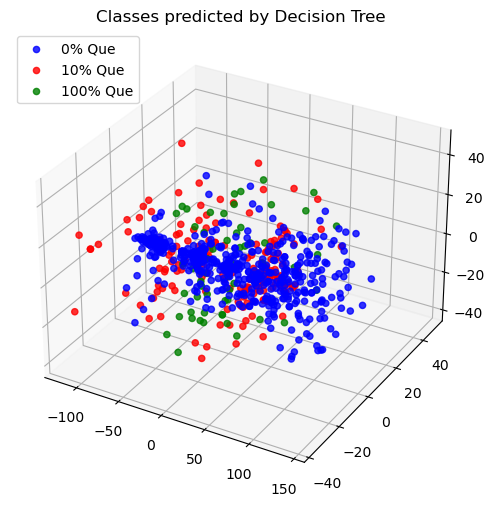

In [14]:
draw_classes_scatterplot(X_test, dtc_pred, "Classes predicted by Decision Tree",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Random Forest Classifer

In [15]:
rfc = RandomForestClassifier(n_estimators=35, max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.76113861 0.74257426 0.75216853 0.75092937]
 CV Mean score: 0.7517026911798986


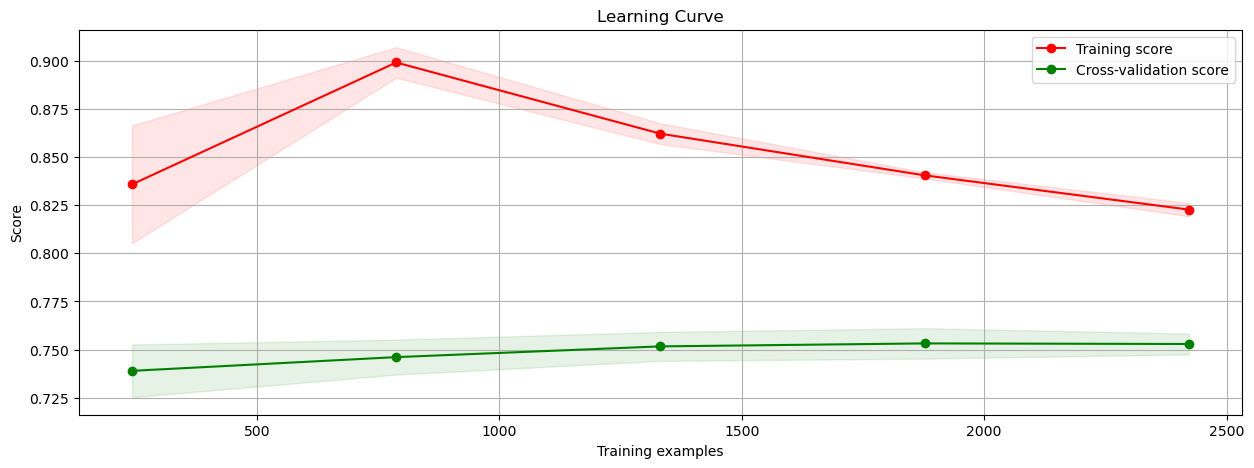

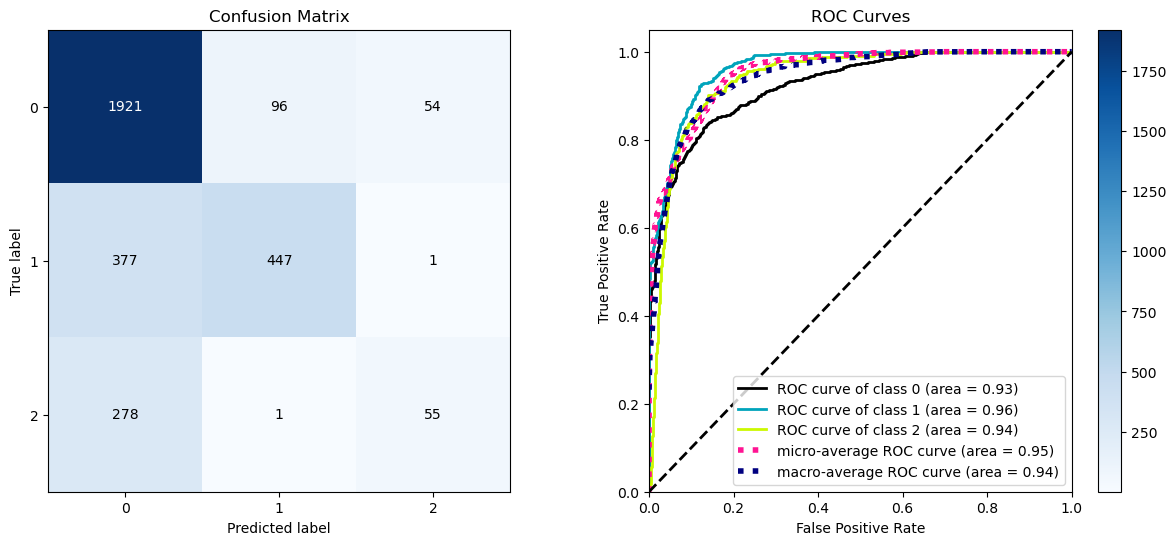

In [16]:
run_model(rfc, X_train, y_train)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15,
                       n_estimators=35)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
f1_score(y_test, rfc_pred, average='weighted')

0.7267287984989264

In [20]:
accuracy_score(y_test, rfc_pred)

0.7574257425742574

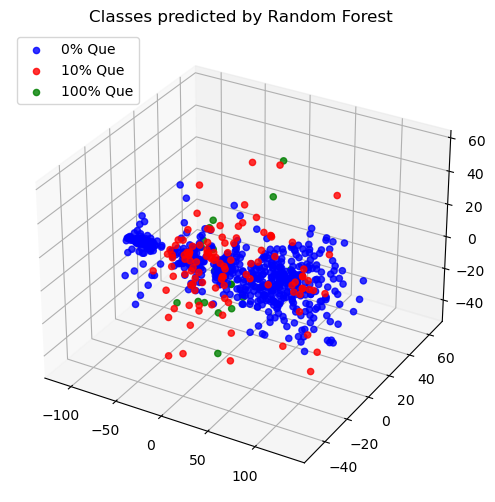

In [21]:
draw_classes_scatterplot(X_test, rfc_pred, "Classes predicted by Random Forest",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Light GBM Classifier

In [22]:
lgbm = LGBMClassifier(n_estimators=15, max_depth=3, min_child_samples=10)

 CV Scores: [0.74381188 0.75371287 0.74597274 0.74845105]
 CV Mean score: 0.7479871360742022


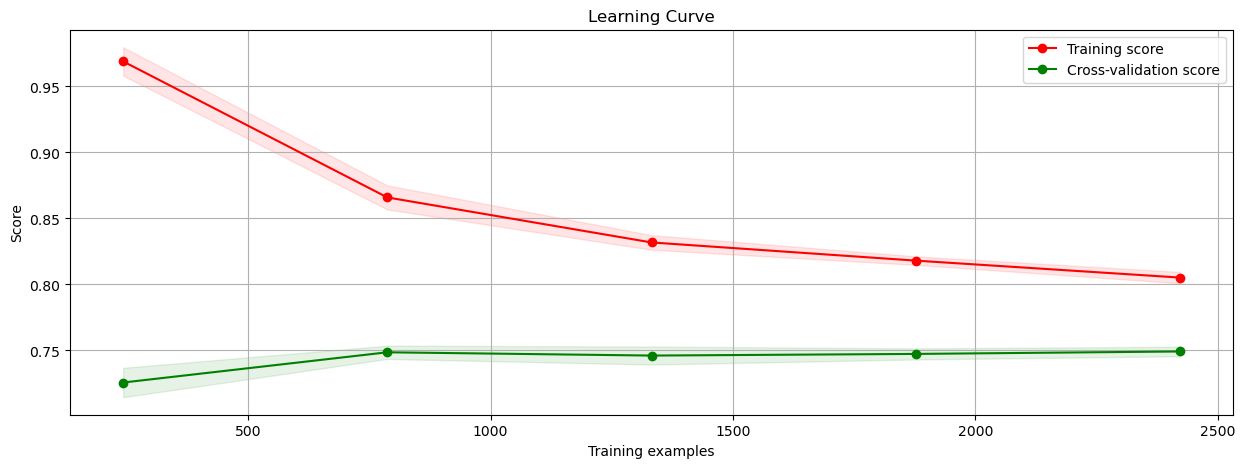

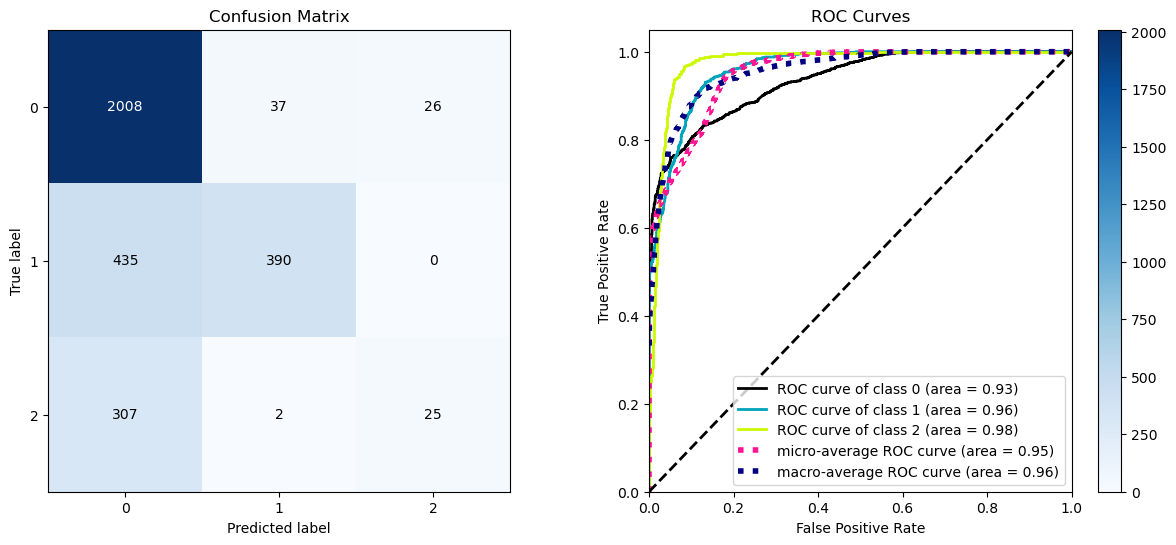

In [23]:
run_model(lgbm, X_train, y_train)

In [24]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=10, n_estimators=15)

In [25]:
lgbm_pred = lgbm.predict(X_test)

In [26]:
f1_score(y_test, lgbm_pred, average='weighted')

0.7165180870807532

In [27]:
accuracy_score(y_test, lgbm_pred)

0.7623762376237624

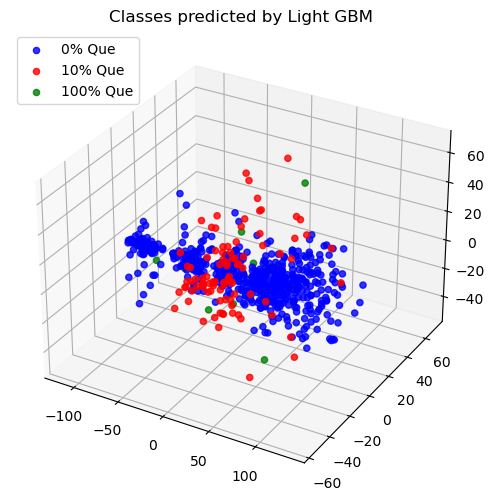

In [28]:
draw_classes_scatterplot(X_test, lgbm_pred, "Classes predicted by Light GBM", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Time Series Forest Classifier

In [29]:
tsf = TimeSeriesForest(n_estimators=18, max_depth=6, min_samples_leaf=10)

 CV Scores: [0.8279703  0.81435644 0.83023544 0.81660471]
 CV Mean score: 0.822291720343038


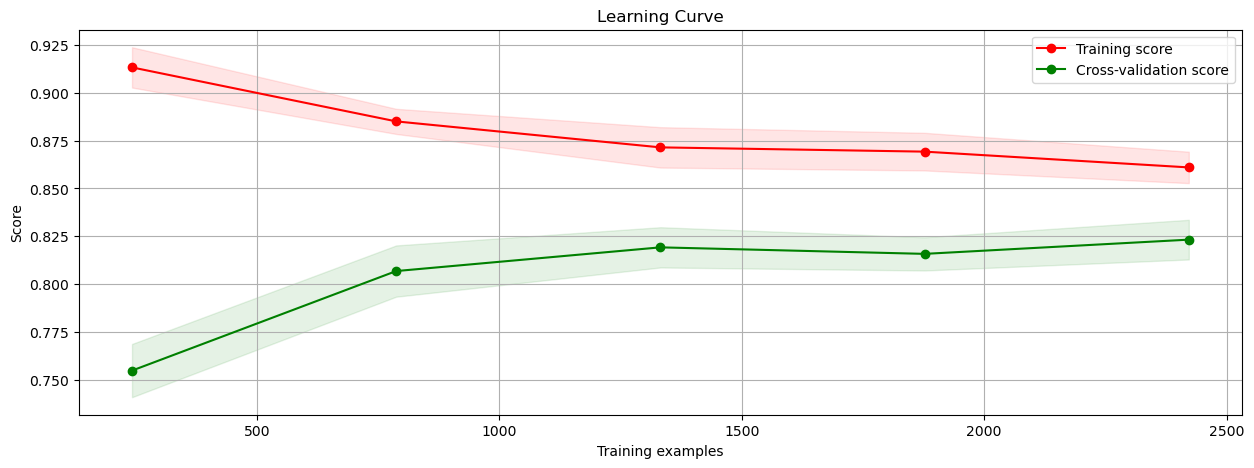

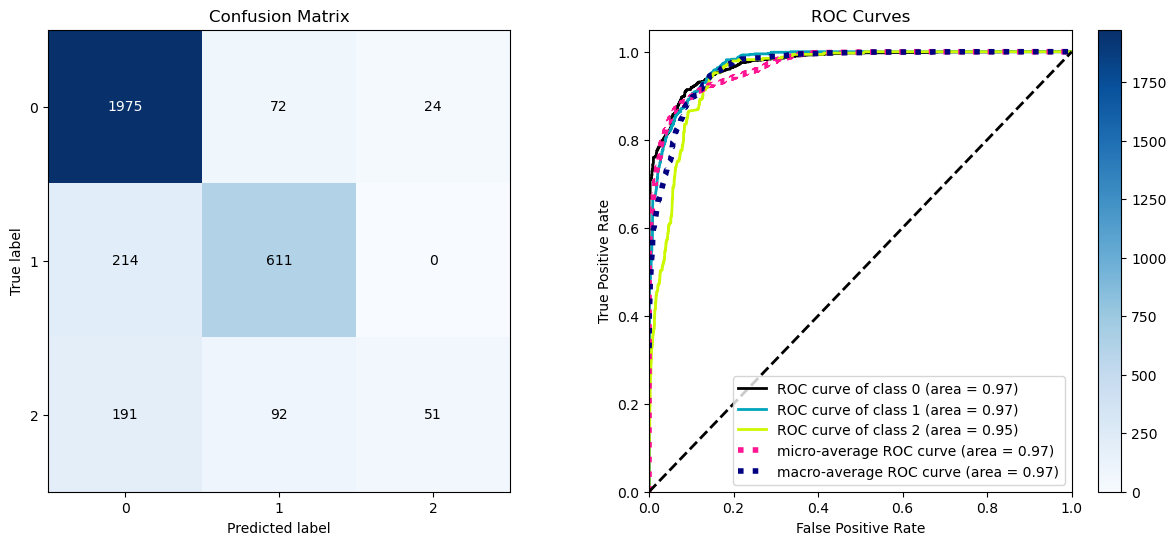

In [30]:
run_model(tsf, X_train, y_train)

In [31]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=6, min_samples_leaf=10, n_estimators=18)

In [32]:
tsf_pred = tsf.predict(X_test)

In [33]:
f1_score(y_test, tsf_pred, average='weighted')

0.8253176195817915

In [34]:
accuracy_score(y_test, tsf_pred)

0.8477722772277227

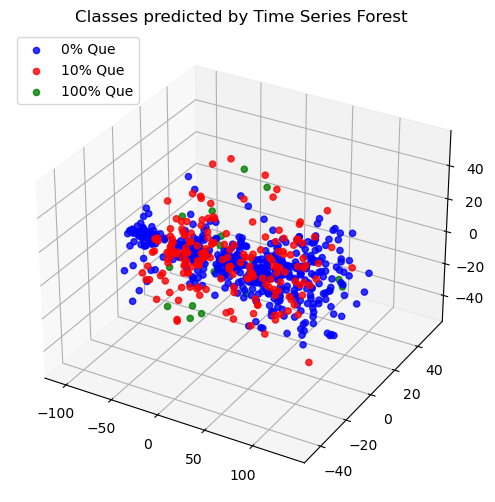

In [35]:
draw_classes_scatterplot(X_test, tsf_pred, "Classes predicted by Time Series Forest", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## TSBF

In [36]:
tsbf = TSBF(n_estimators=50, max_leaf_nodes=15, max_depth=8, min_samples_leaf=10)

 CV Scores: [0.81806931 0.82673267 0.85130112 0.82156134]
 CV Mean score: 0.8294161084324045


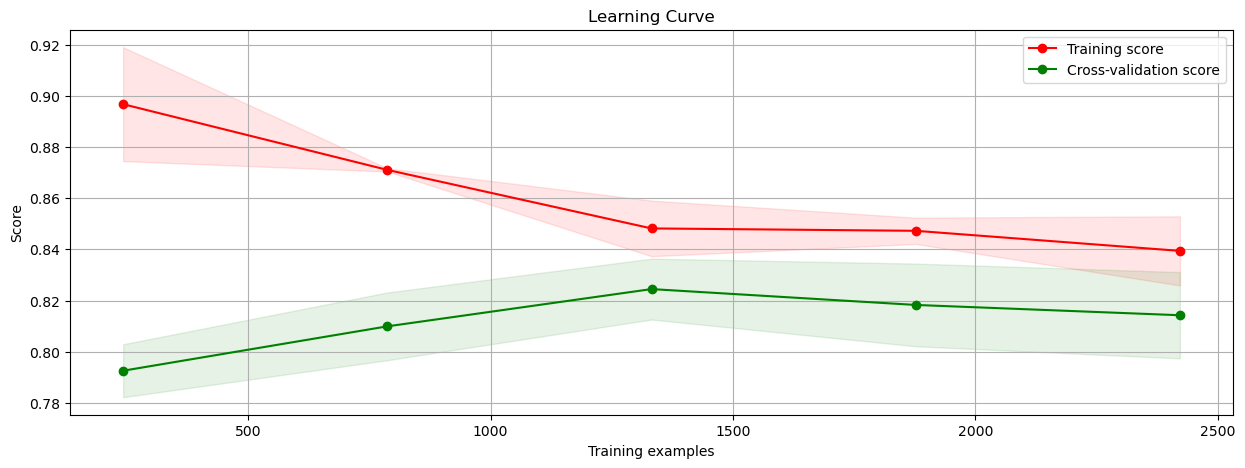

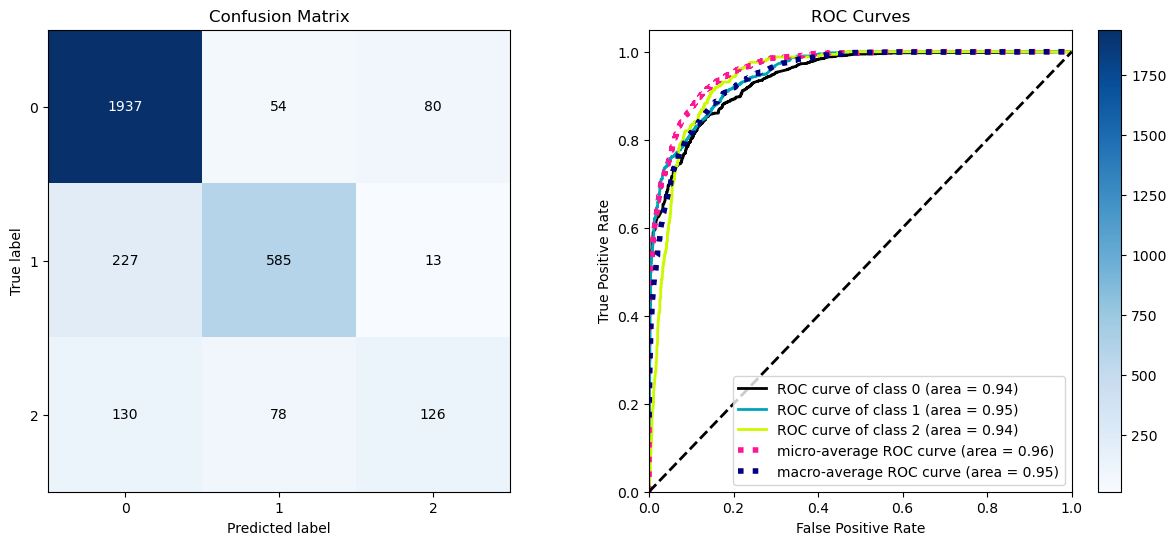

In [37]:
run_model(tsbf, X_train, y_train)

In [38]:
tsbf.fit(X_train, y_train)

TSBF(max_depth=8, max_leaf_nodes=15, min_samples_leaf=10, n_estimators=50)

In [39]:
tsbf_pred = tsbf.predict(X_test)

In [40]:
f1_score(y_test, tsbf_pred, average='weighted')

0.8324523532180096

In [41]:
accuracy_score(y_test, tsbf_pred)

0.8391089108910891

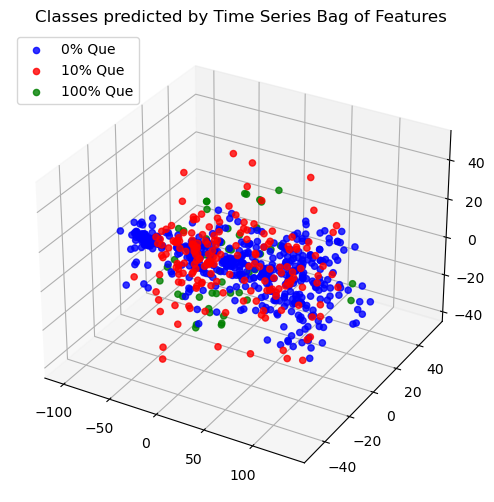

In [42]:
draw_classes_scatterplot(X_test, tsbf_pred, "Classes predicted by Time Series Bag of Features", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])